Name : **Niddhi Rijhwani** Class : **D15B** RollNo : **47**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/aids_3.csv')
pd.set_option('display.max_columns',None)
df.head()

,Product_ID,Occupation,Marital_Status,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14,category_15,category_16,category_17,category_18,category_19,category_20
0,P00069042,10,0,-0.177973,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,P00248942,10,0,1.181756,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,P00087842,10,0,-1.561193,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,P00085442,10,0,-1.633858,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,P00285442,16,0,-0.257805,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# 1. Pearson’s Correlation Coefficient between Age Groups and Purchase.

In [ ]:
from scipy.stats import pearsonr
# List of Age Group columns
age_groups = ['Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+']

# Calculate Pearson correlation between each age group and Purchase
correlations = {}
for age_group in age_groups:
    corr, p_value = pearsonr(df[age_group], df['Purchase'])
    correlations[age_group] = {"Pearson Coefficient": corr, "p-value": p_value}

# Convert to DataFrame for better readability
correlation_df = pd.DataFrame(correlations).T
print(correlation_df)

           Pearson Coefficient       p-value
Age_18-25            -0.006826  4.417592e-07
Age_26-35            -0.000356  7.921135e-01
Age_36-45             0.005928  1.156343e-05
Age_46-50            -0.004060  2.666375e-03
Age_51-55             0.012615  1.024238e-20
Age_55+               0.000857  5.260627e-01


<ipython-input-4-d1e8ea925042>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_df.index, y=correlation_df["Pearson Coefficient"], palette="coolwarm")


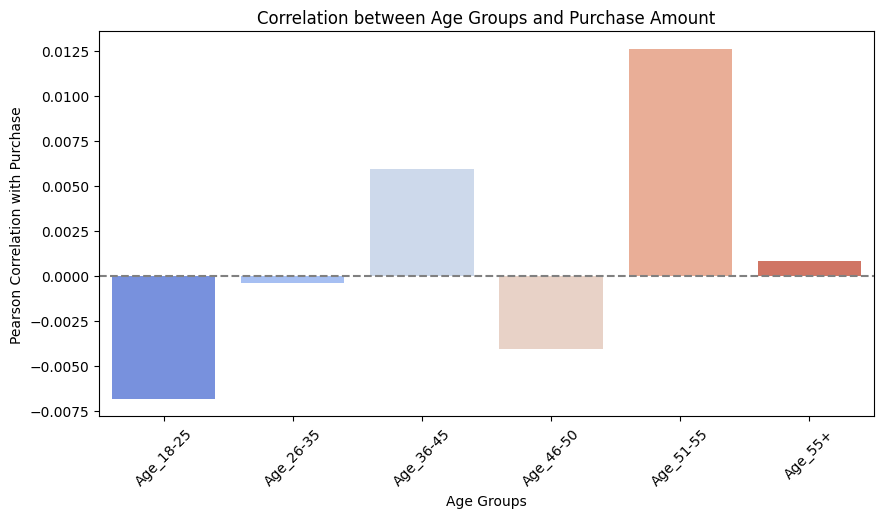

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization: Bar Plot of Pearson Correlation Coefficients
plt.figure(figsize=(10, 5))
sns.barplot(x=correlation_df.index, y=correlation_df["Pearson Coefficient"], palette="coolwarm")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Age Groups")
plt.ylabel("Pearson Correlation with Purchase")
plt.title("Correlation between Age Groups and Purchase Amount")
plt.xticks(rotation=45)
plt.show()

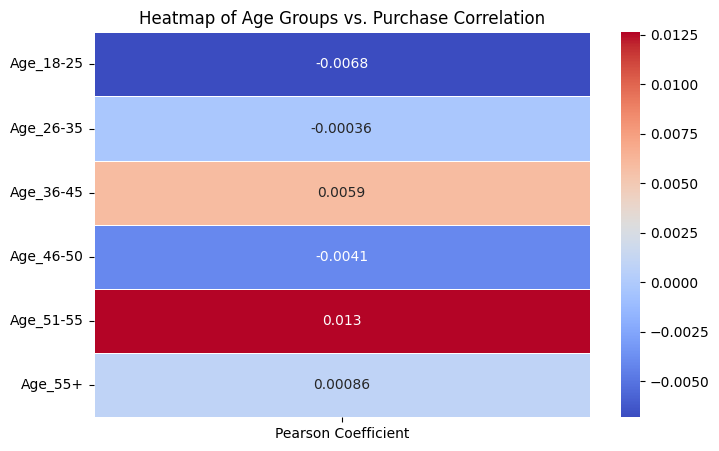

In [ ]:
# Visualization: Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_df[["Pearson Coefficient"]], annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Age Groups vs. Purchase Correlation")
plt.show()

**Key Findings**

1. Most correlations are extremely weak (~0.00 to ±0.01) → Age groups do not strongly influence purchase amount.

2. Ages 26-35 and 55+ show no significant correlation (p > 0.05) → Purchase behavior in these groups is random.
3. Ages 18-25, 36-45, 46-50, and 51-55 show statistically significant but weak correlations (p < 0.05). However, the correlation values are still very small, meaning age alone does not impact purchase significantly.
4. 51-55 has the highest positive correlation (+0.0126), but it is still weak → Older individuals may spend slightly more, but the effect is minimal.
**CONCLUSION: Age does not strongly determine purchase amount (very weak correlations).**

# 2. Spearman’s Rank Correlation  between  Marital_Status and Purchase.

In [ ]:
from scipy.stats import spearmanr
# Calculate Spearman's Rank Correlation
corr, p_value = spearmanr(df["Marital_Status"], df["Purchase"])

# Print results
print(f"Spearman's Rank Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

Spearman's Rank Correlation Coefficient: 0.000534824329308839
P-value: 0.6923310808927554


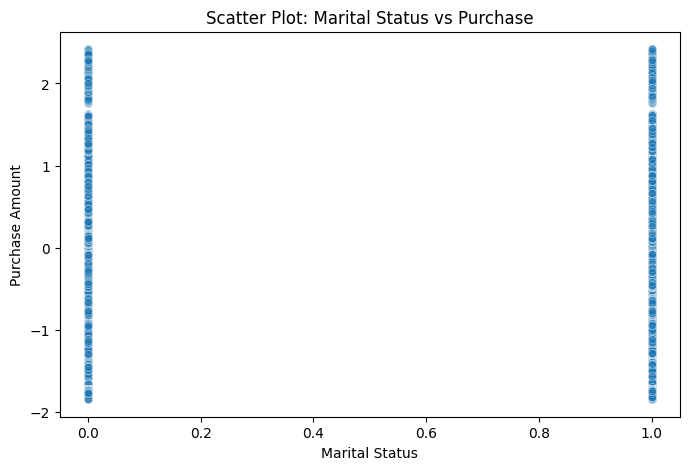

In [ ]:
# Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Marital_Status"], y=df["Purchase"], alpha=0.5)
plt.xlabel("Marital Status")
plt.ylabel("Purchase Amount")
plt.title("Scatter Plot: Marital Status vs Purchase")
plt.show()

**Key Findings:**
1. Spearman’s Correlation Coefficient (0.00053)

A value close to 0 means almost no correlation between Marital_Status and Purchase.

If it were closer to +1 or -1, it would indicate a strong relationship.
2. p-value (0.6923)

Since p > 0.05, the correlation is not statistically significant.

This means the relationship is likely due to random chance and not meaningful.

**CONCLUSION :Marital_Status does not significantly impact Purchase behavior (very weak correlation).**

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# List of Product Categories
product_categories = [f"category_{i}" for i in range(1, 21)]

# Compute Spearman Correlation with Purchase
correlations = {}
for category in product_categories:
    corr, p_value = spearmanr(df[category], df["Purchase"])
    correlations[category] = {"Spearman Coefficient": corr, "p-value": p_value}

# Convert to DataFrame for better readability
correlation_df = pd.DataFrame(correlations).T
print(correlation_df.sort_values("Spearman Coefficient", ascending=False))

             Spearman Coefficient        p-value
category_1               0.497847   0.000000e+00
category_2               0.295271   0.000000e+00
category_6               0.246717   0.000000e+00
category_16              0.169645   0.000000e+00
category_15              0.159367   0.000000e+00
category_10              0.135846   0.000000e+00
category_7               0.092359   0.000000e+00
category_3               0.088477   0.000000e+00
category_17              0.080226   0.000000e+00
category_9               0.005721   2.310802e-05
category_8              -0.025115   4.311952e-77
category_18             -0.037690  3.037837e-171
category_4              -0.055260   0.000000e+00
category_13             -0.061149   0.000000e+00
category_12             -0.090005   0.000000e+00
category_19             -0.093593   0.000000e+00
category_14             -0.099499   0.000000e+00
category_20             -0.116978   0.000000e+00
category_11             -0.180161   0.000000e+00
category_5          

**Key Insights**
1. Product Category 1 has the strongest positive correlation (+0.4978) → This category is associated with higher purchase amounts.
2. Categories 2 & 6 also show a positive correlation (~0.25 to 0.30) → These categories contribute moderately to purchase.
3. Category 5 has the strongest negative correlation (-0.3209) → Purchasing from this category is associated with lower purchase amounts.
4. Other negative categories (11, 20, 19, etc.) → Likely less preferred by high-spending customers.

**CONCLUSION**

**Focus on high-correlation categories (1, 2, 6) to maximize revenue.**

**Investigate why negative categories (5, 11, 20) perform poorly → Are they low-cost items, or do they have low demand?**

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# List of Age Group columns
age_groups = ['Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+']

# Compute Spearman Correlation for Age Groups
age_correlations = {}
for age_group in age_groups:
    corr, p_value = spearmanr(df[age_group], df["Purchase"])
    age_correlations[age_group] = {"Spearman Coefficient": corr, "p-value": p_value}

# Compute Spearman Correlation for Gender
gender_corr, gender_p_value = spearmanr(df["Gender_M"], df["Purchase"])

# Store Gender Correlation
age_correlations["Gender_M"] = {"Spearman Coefficient": gender_corr, "p-value": gender_p_value}

# Convert to DataFrame for better readability
correlation_df = pd.DataFrame(age_correlations).T
print(correlation_df.sort_values("Spearman Coefficient", ascending=False))


           Spearman Coefficient       p-value
Gender_M               0.054415  0.000000e+00
Age_51-55              0.015227  1.917512e-29
Age_36-45              0.006731  6.359167e-07
Age_55+                0.005813  1.701202e-05
Age_46-50             -0.001822  1.775746e-01
Age_26-35             -0.003553  8.566298e-03
Age_18-25             -0.009316  5.472399e-12


**Key Insights**
1. Gender (Males) have a weak positive correlation (0.0544) with Purchase → Males tend to spend slightly more than females, but the effect is small.

2. Older age groups (51-55, 36-45, 55+) show a slight positive correlation → People in these age groups tend to spend marginally more.

3. Younger age groups (18-25, 26-35) have a weak negative correlation → Younger individuals may spend slightly less.

4. Age 46-50 has no significant correlation (p > 0.05) → This group does not show any clear trend in spending behavior.

**Conclusion**

**Gender has a stronger influence on Purchase than Age, but still weak.**

**Age does not significantly affect Purchase behavior → Older people slightly spend more, but the effect is minimal.**

# 3. Kendall’s Rank Correlation between Occupation(because it is ordinal) and Purchase.

In [ ]:
from scipy.stats import kendalltau

# Calculate Kendall’s Rank Correlation
corr, p_value = kendalltau(df["Occupation"], df["Purchase"])

# Print results
print(f"Kendall’s Rank Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

Kendall’s Rank Correlation Coefficient: 0.015170270824635575
P-value: 2.726007901279052e-59


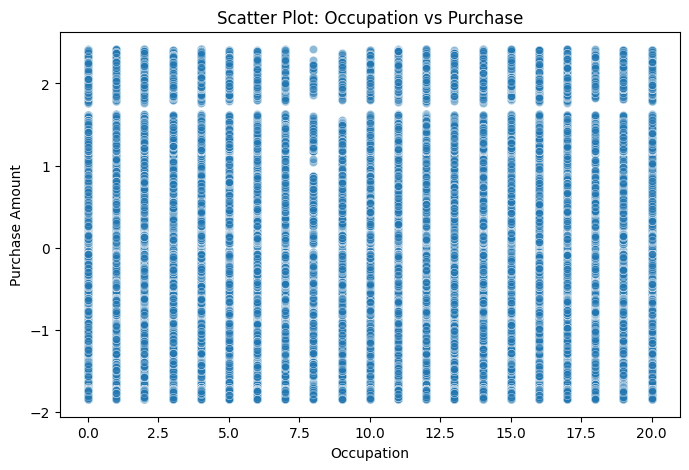

In [ ]:
# Scatter Plot: Occupation vs Purchase
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Occupation"], y=df["Purchase"], alpha=0.5)
plt.xlabel("Occupation")
plt.ylabel("Purchase Amount")
plt.title("Scatter Plot: Occupation vs Purchase")
plt.show()

**Key Findings:**
1. Kendall’s Rank Correlation Coefficient (0.0152)

The correlation is very weak positive (close to 0).
This means Occupation has almost no impact on Purchase.

If it were closer to +1 or -1, it would indicate a strong relationship.
p-value (2.72e-59, almost 0)

2. Since p < 0.05, the correlation is statistically significant.

However, significance does not imply strength—even though the relationship exists, it is extremely weak.

**CONCLUSION: Occupation does not strongly influence Purchase behavior (correlation is too weak).**

# 4. Chi-Squared Test
Age Groups vs Product Categories → Do different age groups buy different types of products?

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Define Age Groups and Product Categories
age_groups = ['Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+']
product_categories = [f"category_{i}" for i in range(1, 21)]

# Create a contingency table (Cross-tabulation)
contingency_table = pd.DataFrame()

for category in product_categories:
    contingency_table[category] = [df[df[age] == 1][category].sum() for age in age_groups]

contingency_table.index = age_groups

# Normalize the contingency table row-wise
contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)

print("Normalized Contingency Table:\n", contingency_table_normalized)

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"\nChi-Square Statistic: {chi2_stat}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_value}")

# Check significance
alpha = 0.05
if p_value < alpha:
    print("\n🔹 Conclusion: There is a significant relationship between Age Groups and Product Categories (Reject Null Hypothesis).")
else:
    print("\n🔹 Conclusion: No significant relationship between Age Groups and Product Categories (Fail to Reject Null Hypothesis).")



Normalized Contingency Table:
            category_1  category_2  category_3  category_4  category_5  \
Age_18-25    0.135186    0.071369    0.027577    0.044955    0.187778   
Age_26-35    0.133977    0.066709    0.020988    0.032847    0.181139   
Age_36-45    0.127175    0.066853    0.020589    0.035023    0.173426   
Age_46-50    0.116968    0.064615    0.017879    0.032866    0.167679   
Age_51-55    0.120589    0.065312    0.014312    0.027545    0.163819   
Age_55+      0.107412    0.058540    0.014075    0.025057    0.158452   

           category_6  category_7  category_8  category_9  category_10  \
Age_18-25    0.039585    0.002943    0.154661    0.018893     0.004924   
Age_26-35    0.040350    0.004400    0.173064    0.016002     0.006387   
Age_36-45    0.036522    0.004351    0.178389    0.015920     0.008155   
Age_46-50    0.035836    0.004244    0.191712    0.014373     0.008487   
Age_51-55    0.036780    0.004051    0.200626    0.013806     0.009422   
Age_55+      

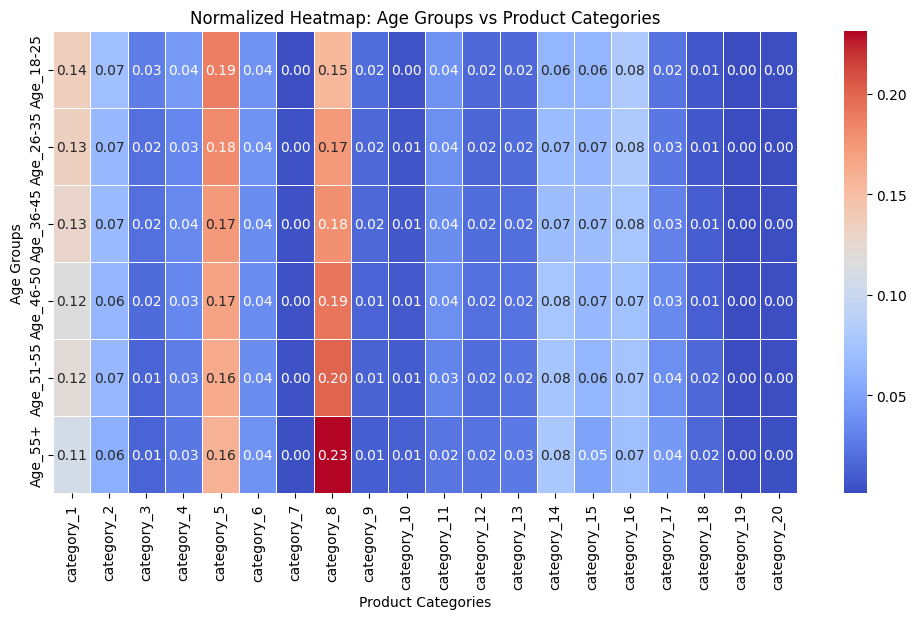

In [ ]:
# 🔹 Heatmap for Normalized Purchase Distribution Across Age Groups & Product Categories
plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table_normalized, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.xlabel("Product Categories")
plt.ylabel("Age Groups")
plt.title("Normalized Heatmap: Age Groups vs Product Categories")
plt.show()


**Key Insights from Contingency Table:**
1. Distinct Purchase Patterns Across Age Groups:

    Different age groups show varying preferences for product categories, confirming a significant relationship.
2. Category 8 is the Most Preferred by Older Age Groups (55+):

    The darkest red region indicates that Age 55+ purchases category_8 the most, suggesting it could be a health-related or essential product.
3. Younger Age Groups Prefer Category 5 & Category 1:

    Age 18-25 and 26-35 show a higher proportion for category_5, indicating interest in lifestyle or trending products.

    Category_1 also sees significant purchases across age groups, but more evenly distributed.
4. Least Preferred Categories:

    Category 19 and 20 show very low engagement across all age groups, suggesting they are niche products.
5. Age 36-45 is More Evenly Distributed Across Categories:

    Unlike younger and older groups with strong preferences, this age range purchases from a wider set of categories.

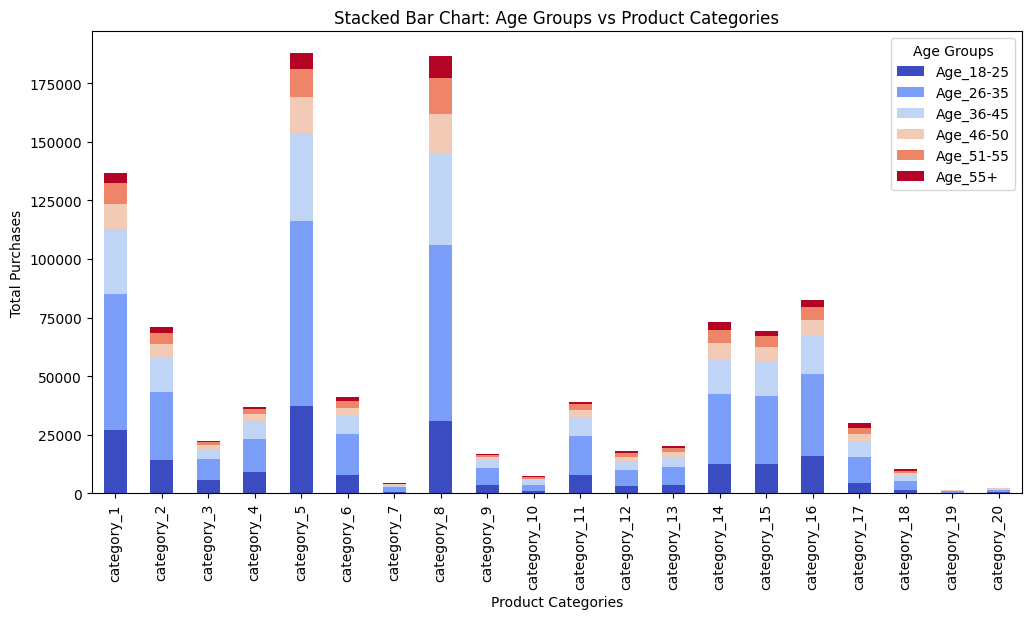

In [ ]:
# 🔹 Stacked Bar Chart for Age Group Preferences Across Product Categories
contingency_table.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.xlabel("Product Categories")
plt.ylabel("Total Purchases")
plt.title("Stacked Bar Chart: Age Groups vs Product Categories")
plt.legend(title="Age Groups", bbox_to_anchor=(1, 1))
plt.show()

**Key Observations**
1. Product Categories 1, 5, and 8 have the highest total purchases.
2. Younger age groups (18-35) contribute the most purchases (dark blue & blue are larger).
3. Older age groups (51-55, 55+) buy less in most categories.
4. Some categories (like 16 & 17) show a more even distribution across age groups.

